**Level 2 : Rstaurant Data Analysis**

In [6]:
# import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Pre-Processing

In [7]:
# dataset Loading
data = pd.read_csv("/content/Dataset .csv")
data.shape

(9551, 21)

In [8]:
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

**Task 1: Restaurent rating**

**Analyze the distribution of aggregate
ratings and determine the most common
rating range.**

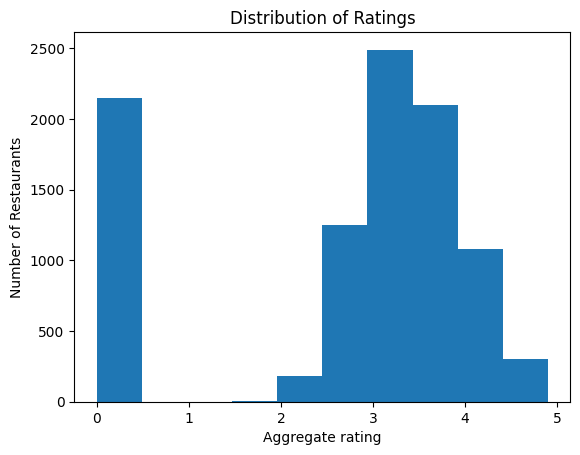

In [49]:
# Analyze the distribution of aggregate ratings and determine the most common rating range.
plt.hist (data['Aggregate rating'])
plt.xlabel('Aggregate rating')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Ratings')
plt.show()

**Calculate the average number of votes
received by restaurants.**

In [11]:
#Calculate the average number of votes received by restaurants.
Avg_votes_received = data['Votes'].mean()
print(Avg_votes_received)

156.909747670401


**Task 2: Cuisine Combination**

**Identify the most common combinations of cuisines in the dataset.**


In [41]:

# Flatten the list of cuisines into individual rows
common_cuisines = data['Cuisines'].str.split(',').explode()

# Count the occurrences of each cuisine combination
common_combination_cuisines = common_cuisines.value_counts()

# Display the most common combinations
print(common_combination_cuisines)

North Indian      2992
 Chinese          1880
 Fast Food        1314
 North Indian      968
Chinese            855
                  ... 
 Ramen               1
Indonesian           1
 Bubble Tea          1
Kiwi                 1
 World Cuisine       1
Name: Cuisines, Length: 249, dtype: int64


**Determine if certain cuisine combinations tend to have higher ratings.**

In [42]:

df_exploded = data.explode('Cuisines')

# Calculate the average rating for each cuisine
average_ratings_by_cuisine = df_exploded.groupby('Cuisines')['Aggregate rating'].mean()

# Display the average ratings for each cuisine
print("Average ratings for each cuisine:")
print(average_ratings_by_cuisine)


Average ratings for each cuisine:
Cuisines
Afghani                                      0.725
Afghani, Mughlai, Chinese                    0.000
Afghani, North Indian                        0.000
Afghani, North Indian, Pakistani, Arabian    0.000
African                                      4.700
                                             ...  
Western, Asian, Cafe                         4.200
Western, Fusion, Fast Food                   3.200
World Cuisine                                4.900
World Cuisine, Mexican, Italian              4.400
World Cuisine, Patisserie, Cafe              4.200
Name: Aggregate rating, Length: 1825, dtype: float64


**Task 3: Geographic Analysis**

**Plot the locations of restaurants on a map using longitude and latitude coordinates.**


<ipython-input-14-e4fadfc2f54e>:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


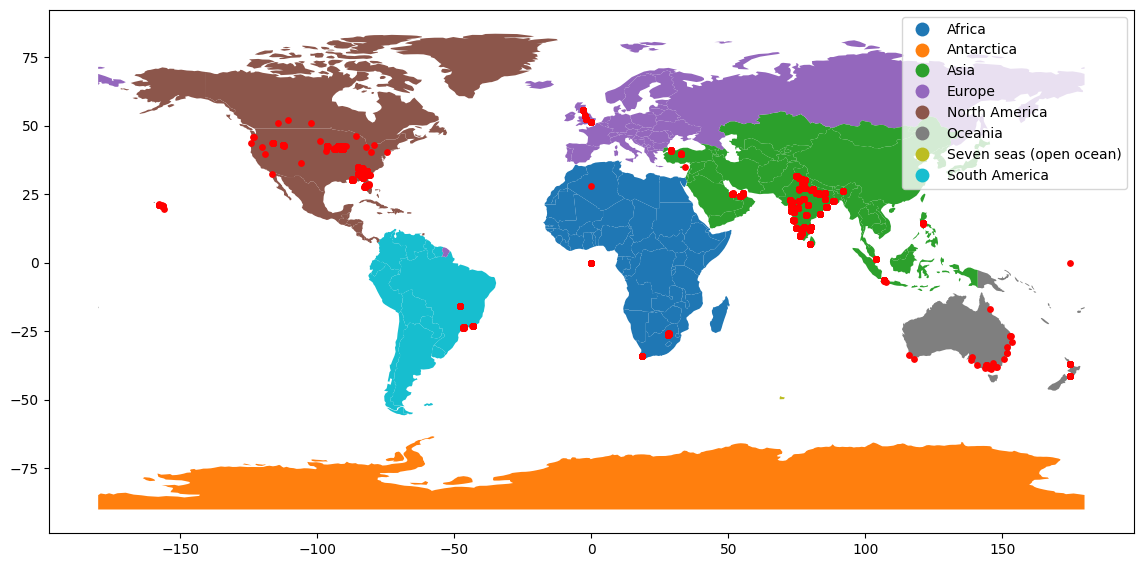

In [14]:

# Locations of restaurants on a map using latitude and longitude information
# Import the necessary libraries
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

# Create Point geometry from latitude and longitude using Shapely
gdf = gpd.GeoDataFrame(
    data,
    geometry=gpd.points_from_xy(data.Longitude, data.Latitude)
)

# Create a base map of the world using Geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a map that fits the screen and plots the restaurant locations
# The "continent" column is used for coloring and a legend is displayed
gdf.plot(ax=world.plot("continent", legend = True, figsize=(14, 12)), marker='o', color='red', markersize=15)

# Show the map
plt.show()

**Identify any patterns or clusters of
restaurants in specific areas.**

<function matplotlib.pyplot.show(close=None, block=None)>

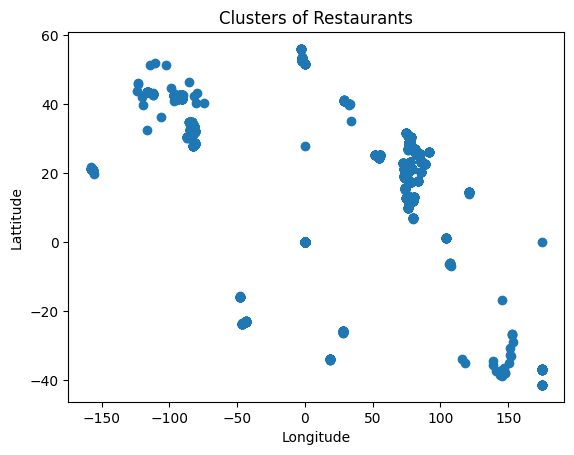

In [48]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
plt.title('Clusters of Restaurants')
plt.show

# **Task 4: Restaurant Chains**

**Identify if there are any restaurant chains
present in the dataset.**

In [47]:
chain = data['Restaurant Name'].value_counts()
restaurent_chain = chain[chain>1]
print(restaurent_chain)

Cafe Coffee Day       83
Domino's Pizza        79
Subway                63
Green Chick Chop      51
McDonald's            48
                      ..
Town Hall              2
Halki Aanch            2
Snack Junction         2
Delhi Biryani Hut      2
Beliram Degchiwala     2
Name: Restaurant Name, Length: 734, dtype: int64


**Analyze the ratings and popularity of
different restaurant chains.**

In [ ]:

# Group by restaurant chain and calculate average rating and popularity
chain_stats = data.groupby('Restaurant Name').agg({'Aggregate rating': 'mean', 'Restaurant ID': 'count'}).reset_index()
chain_stats.columns = ['Restaurant Name','Average Rating','Popularity']

# To analyze the  popularity of different restaurent chains.
chain_stats.sort_values(by='Popularity', ascending=False,inplace=True)
chain_stats

# To analyze the rating and popularity of different restaurent chains.
chain_stats.sort_values(by='Average Rating', ascending=False,inplace=True)
chain_stats

# Plot the results
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.bar(chain_stats['Restaurant Name'][:10],chain_stats['Average Rating'][:10],color='b')
plt.xlabel('Restaurant Name')
plt.ylabel('Average Rating')
plt.title('Restaurant chain ratings')




In [ ]:
plt.subplot(1,2,2)
# Bar chart for average rating
plt.bar(chain_stats['Restaurant Name'][:10],chain_stats['Popularity'][:10],color='y')
plt.xlabel('Restaurant Name')
plt.ylabel('Popularity')
plt.title('Popularity of Restaurant Chains')
plt.show()